# Visualize Train Data and Create Train and Validation Split

In [2]:
# visualization and manipulation libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

%matplotlib inline
# to display visuals in the notebook

%config InlineBackend.figure_format='retina'
#to enable high resolution plots

# feature prepocessing and split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# functions to use throughout the notebook
def plot_histogram(df, column):
    # set the histogram, mean and median
    g = sns.distplot(df[column], kde=False)
    plt.axvline(x=df[column].mean(),
                linewidth=3,
                color='g',
                label="mean",
                alpha=0.5)
    plt.axvline(x=df[column].median(),
                linewidth=3,
                color='y',
                label="median",
                alpha=0.5)

    # set title, legends and labels
    plt.xlabel("{}".format(column), size=14)
    plt.ylabel("Count", size=14)
    plt.title("Distribution of {}".format(column), size=16)
    plt.legend(["mean", "median"])
    
    return g

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def plot_distribution(df, target, column_values, column_name):
    
    for value in column_values:
        subset = df[df[column_name] == value]
        g = sns.kdeplot(subset[target], label=value, linewidth=3)

    # set title, legends and labels
    plt.ylabel("Density", size=14)
    plt.xlabel("{}".format(target), size=14)
    plt.title("Density of {} Per {}".format(target, column_name), size=16)
    
    return g

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
print("There are {} rows and {} columns in the train dataset."
      .format(train.shape[0], train.shape[1]))

There are 9000 rows and 13 columns in the train dataset.


In [6]:
print("There are {} rows and {} columns in the train dataset."
      .format(test.shape[0], test.shape[1]))

There are 1000 rows and 13 columns in the train dataset.


# 1.Understand Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                8994 non-null   object 
 1   description            9000 non-null   object 
 2   designation            6455 non-null   object 
 3   points                 9000 non-null   int64  
 4   price                  8403 non-null   float64
 5   province               8994 non-null   object 
 6   region_1               7505 non-null   object 
 7   region_2               3469 non-null   object 
 8   taster_name            7223 non-null   object 
 9   taster_twitter_handle  6888 non-null   object 
 10  title                  9000 non-null   object 
 11  variety                9000 non-null   object 
 12  winery                 9000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 914.2+ KB


In [8]:
train.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Expressive aromas of smoke, embers and blue fr...",NaN,88,35.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Damsel 2013 Syrah (Columbia Valley (WA)),Syrah,Damsel
1,South Africa,"Soft mint, spice, cocoa and smoke on the nose ...",Redhill,89,30.0,Stellenbosch,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Simonsig 2005 Redhill Pinotage (Stellenbosch),Pinotage,Simonsig
2,Portugal,"An elegant, finely rounded wine, with firm tan...",NaN,90,NaN,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta de la Rosa 2008 Red (Douro),Portuguese Red,Quinta de la Rosa
3,South Africa,Winemaker: Louis Nel. This Cab-Shiraz blend is...,Cape Winemakers Guild Rapscallion,91,NaN,Stellenbosch,NaN,NaN,Lauren Buzzeo,@laurbuzz,Louis Nel 2015 Cape Winemakers Guild Rapscalli...,Cabernet Sauvignon-Shiraz,Louis Nel
4,Portugal,"Lightly wood aged and spicy, this is a fine re...",Casa Américo Branco Reserva,90,NaN,Dão,NaN,NaN,Roger Voss,@vossroger,Seacampo 2014 Casa Américo Branco Reserva Encr...,Encruzado,Seacampo


In [9]:
train.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2557,France,"Smooth and soft, this has light, fresh red-ber...",Les Demoiselles Tatin,87,20.0,Loire Valley,Reuilly,NaN,Roger Voss,@vossroger,Domaines Tatin 2014 Les Demoiselles Tatin Pino...,Pinot Noir,Domaines Tatin
5624,US,Sonoma's Roessler brothers deliver a great Gre...,Camp 4 Vineyard,91,34.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,R2 2012 Camp 4 Vineyard Grenache (Santa Ynez V...,Grenache,R2
7171,US,This weighty wine has small percentages of Pet...,Emblem,88,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Michael Mondavi Family Estate 2014 Emblem Cabe...,Cabernet Sauvignon,Michael Mondavi Family Estate
4498,France,There is a yeasty rounded freshness on the nos...,Vieilles Vignes,89,22.0,Alsace,Alsace,NaN,Anne Krebiehl MW,@AnneInVino,Domaine Schoffit 2015 Vieilles Vignes Chassela...,Chasselas,Domaine Schoffit
8002,Spain,"More red than dark, with semisweet aromas of c...",NaN,86,23.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Los 800 2004 Red (Priorat),Red Blend,Los 800


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1000 non-null   object 
 1   description            1000 non-null   object 
 2   designation            716 non-null    object 
 3   points                 1000 non-null   int64  
 4   price                  920 non-null    float64
 5   province               1000 non-null   object 
 6   region_1               831 non-null    object 
 7   region_2               384 non-null    object 
 8   taster_name            792 non-null    object 
 9   taster_twitter_handle  756 non-null    object 
 10  title                  1000 non-null   object 
 11  variety                1000 non-null   object 
 12  winery                 1000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


## 1.1. Information about columns & descriptive statistics & missing values

In [11]:
train.describe()

,points,price
count,9000.000000,8403.000000
mean,88.455222,35.532191
std,3.025945,40.750683
min,80.000000,5.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,1300.000000


In [12]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
region_2,5531,61.5
designation,2545,28.3
taster_twitter_handle,2112,23.5
taster_name,1777,19.7
region_1,1495,16.6
price,597,6.6
country,6,0.1
province,6,0.1


More than 50% of the data is missing in the region_2 column. Majority of the data being missing may mislead the machine learning models so it will be dropped in the *Drop Columns* part. 

Rest of the columns will be investigated further.

In [13]:
missing_values_table(test)

Your selected dataframe has 13 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
region_2,616,61.6
designation,284,28.4
taster_twitter_handle,244,24.4
taster_name,208,20.8
region_1,169,16.9
price,80,8.0


Missing values in the test dataset will be handled before evaluating the models.

## 1.2. Check for cardinality of train dataset-object columns

In [14]:
for column in train.select_dtypes(include="object").columns:
    print("{} has {} unique values.".format(column, train[column].nunique()))

country has 37 unique values.
description has 8948 unique values.
designation has 4913 unique values.
province has 236 unique values.
region_1 has 699 unique values.
region_2 has 17 unique values.
taster_name has 18 unique values.
taster_twitter_handle has 14 unique values.
title has 8937 unique values.
variety has 325 unique values.
winery has 5097 unique values.


In [15]:
train.description.value_counts()

A smooth and ripe wine produced by the team of Cos d'Estournel. It is full and rich with black-plum fruits and velvet tannins. With fine acidity at the back, it has kept its freshness. Drink from 2022.                                                                                                   2
Like the barrica (barrel) in its name implies, this is a toasty wine, with vanilla, yeast and elegant white-fruit aromas. Full bodied, it has citrus and apple notes, with mild oxidation in front of the toasty finish. A classy Cava to drink now.                                                        2
This is a proper El Dorado Zin. It's still tight and tannic, but air and time reveal a lovely bouquet of lavender and crushed herbs that's layered, soft and spicy on the finish. Miraflores is making some lovely wines and this is one worth seeking out.                                                 2
Smooth, velvet texture seem to leave the freshness on one side. It's delicious, like drinking 

In [84]:
train[train["points"] == 100]

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety
4037,France,This new release from a great vintage for Char...,100,617.0,Champagne,Champagne,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay
6100,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Toscana,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot
8293,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile


In [91]:
train[train["price"] > 200]

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety
204,Italy,"You pay, dearly, for quality, but rest assured...",92,210.0,Piedmont,Barbaresco,NaN,NaN,Gaja 2005 Barbaresco,Nebbiolo
332,France,This Premier Cru abuts some of the grandest Gr...,94,220.0,Burgundy,Vosne-Romanée,Roger Voss,@vossroger,Domaine de Bellene 2014 Les Suchots Premier Cr...,Pinot Noir
568,France,"Mint aromas hint at the wood, but more importa...",95,412.0,Bordeaux,Pauillac,Roger Voss,@vossroger,Château Latour 2009 Les Forts de Latour (Paui...,Bordeaux-style Red Blend
648,US,Lots of fresh herbs and spices in this beautif...,95,275.0,California,Napa Valley,NaN,NaN,BOND 2005 Melbury Red (Napa Valley),Bordeaux-style Red Blend
733,France,"Impressively weighty wine, with a fine combina...",95,375.0,Bordeaux,Pomerol,Roger Voss,@vossroger,Château Hosanna 2009 Pomerol,Bordeaux-style Red Blend
991,Portugal,This 1967 is part of Taylor Fladgate's regular...,94,300.0,Port,NaN,Roger Voss,@vossroger,Taylor Fladgate 1967 Single Harvest (Port),Port
1049,France,The largest of the four grands crus in Morey-S...,97,286.0,Burgundy,Clos de la Roche,Roger Voss,@vossroger,Louis Jadot 2014 Clos de la Roche,Pinot Noir
1056,France,"A marvelously intense wine, the Chardonnay sin...",97,410.0,Burgundy,Bienvenues Bâtard-Montrachet,Roger Voss,@vossroger,Domaine Leflaive 2008 Bienvenues Bâtard-Montr...,Chardonnay
1462,Italy,Biondi-Santi performs exceptionally well in el...,94,900.0,Tuscany,Brunello di Montalcino,NaN,NaN,Biondi Santi 2006 Riserva (Brunello di Montal...,Sangiovese Grosso
1471,France,"Certainly it is firm, with impressive power. B...",96,250.0,Bordeaux,Pomerol,Roger Voss,@vossroger,Château Trotanoy 2005 Pomerol,Bordeaux-style Red Blend


In [88]:
train.loc[4037,]["description"]

'This new release from a great vintage for Chardonnay in Champagne is a perfect blanc de blancs, showing a wealth of intensity from the crisp, chalky, mineral tones to the perfumed apple notes. The aromas hint at developing toastiness that adds depth and complexity. The wine is still young and it will age for years. Drink from 2020.'

In [16]:
train[train["description"] == "Earth and apple notes unite to make this juicy, fresh and sprightly Riesling. The style is dry, helped by a slight phenolic grip and that characteristic, lime-lemon acidity that brightens everything."]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
898,France,Earth and apple notes unite to make this juicy...,Muhlforst,88,34.0,Alsace,Alsace,NaN,Anne Krebiehl MW,@AnneInVino,Domaine Vincent Stoeffler 2014 Muhlforst Riesl...,Riesling,Domaine Vincent Stoeffler
7583,France,Earth and apple notes unite to make this juicy...,Muhlforst,88,34.0,Alsace,Alsace,NaN,Anne Krebiehl MW,@AnneInVino,Domaine Vincent Stoeffler 2014 Muhlforst Riesl...,Riesling,Domaine Vincent Stoeffler


In [17]:
train[train["description"] == "Pressed violet, baked plum, baking spice and coconut emerge on the nose and carry over to the full-bodied palate along with ripe black cherry and licorice. Tightly packed but refined tannins provide firm support."]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1301,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90,45.0,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,Red Blend,David Sterza
4590,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90,45.0,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,Red Blend,David Sterza


In [18]:
train.title.value_counts()

Ca' del Bosco NV Cuvée Prestige Sparkling (Franciacorta)                                     3
Colliano 2013 Cuvée White (Goriska Brda)                                                     2
Vilarnau NV Reserva Brut Rosé Sparkling (Cava)                                               2
Hafner 2006 Old Vienna Red Cuvée Trockenbeerenauslese Zweigelt (Burgenland)                  2
Domaine Vincent Stoeffler 2014 Muhlforst Riesling (Alsace)                                   2
                                                                                            ..
Goldeneye 2011 Gowan Creek Vineyard Estate Grown Pinot Noir (Anderson Valley)                1
Écluse 2015 Prelude White (Paso Robles)                                                      1
Amantis 2014 Goghi Red (Toscana)                                                             1
Tardieu-Laurent 2013 Vieilles Vignes  (Saint-Joseph)                                         1
Louis Nel 2015 Cape Winemakers Guild Rapscallion C

In [19]:
train[train["title"] == "Domaine Serene 2014 Récolte Grand Cru Chardonnay (Dundee Hills)"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4999,US,Multiple vineyards contribute to this standout...,Récolte Grand Cru,93,125.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,Domaine Serene 2014 Récolte Grand Cru Chardonn...,Chardonnay,Domaine Serene
5428,US,Multiple vineyards contribute to this standout...,Récolte Grand Cru,93,125.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,Domaine Serene 2014 Récolte Grand Cru Chardonn...,Chardonnay,Domaine Serene


In [20]:
train.iloc[5234,]["description"]

"This blend is 44% Cab Franc, 31% Cabernet Sauvignon, with the rest Merlot. It's stubbornly closed, with aromas of tar, earth and rubber ball rather than fruit. Some brambly berry flavors can be found, but the finish seems hard and slightly bitter."

In [21]:
train.iloc[8200,]["description"]

"This blend is 44% Cab Franc, 31% Cabernet Sauvignon, with the rest Merlot. It's stubbornly closed, with aromas of tar, earth and rubber ball rather than fruit. Some brambly berry flavors can be found, but the finish seems hard and slightly bitter."

We have some almost free-text like columns:
* description
* designation
* title
* winery

Description is how each taster describes the wine. Thus it contains information about wine's color and sweetness and notes available in the wine like citrus, tannins or several fruit tastes.

Some of them might be useful which will revisit in the Feature Engineering part.

Designation explains the origin of grapes that is used for this wine.

Title contains the year info, which will be extracted in the Feature Engineering part.

Winery is the brand of the wine.

**Description and title** will be dropped after feature extraction.

In addition to the **region_2, designation and winery**  will be dropped in the *Drop Columns* part to keep things simple.

We have some high-cardinality columns:
* province
* region_1
* variety

Some low-cardinality columns:
* country
* taster_name
* taster_twitter_handle

Low cardinality columns will be explored in the next section.

## 1.3. Check unique values of taster_name and taster_twitter_handle

In [22]:
train["taster_name"].unique()

array(['Sean P. Sullivan', 'Susan Kostrzewa', 'Roger Voss',
       'Lauren Buzzeo', 'Joe Czerwinski', 'Michael Schachner',
       'Jim Gordon', 'Kerin O’Keefe', 'Matt Kettmann', nan,
       'Paul Gregutt', 'Virginie Boone', 'Anna Lee C. Iijima',
       'Jeff Jenssen', 'Mike DeSimone', 'Anne Krebiehl\xa0MW',
       'Alexander Peartree', 'Fiona Adams', 'Carrie Dykes'], dtype=object)

In [23]:
train["taster_twitter_handle"].unique()

array(['@wawinereport', '@suskostrzewa', '@vossroger', '@laurbuzz',
       '@JoeCz', '@wineschach', '@gordone_cellars', '@kerinokeefe',
       '@mattkettmann', nan, '@paulgwine\xa0', '@vboone',
       '@worldwineguys', '@AnneInVino', '@bkfiona'], dtype=object)

In [24]:
train[train["taster_twitter_handle"] == "@worldwineguys"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
73,Serbia,A blend of 60% Prokupac and 40% Cabernet Sauvi...,Sub Rosa,89,40.0,Župa,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2009 Sub Rosa Red (Župa),Red Blend,Budimir
103,Israel,"Deep violet red to the eye, this wine offers f...",Amuka Series Marus Single Vineyard,90,17.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Or Haganuz 2012 Amuka Series Marus Single Vine...,Shiraz,Or Haganuz
511,NaN,"Amber to the eye, this wine features an entici...",Dry Unfiltered Rkatsiteli Mtsvane,88,25.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2015 Dry Unfiltered Rkatsit...,White Blend,Gotsa Family Wines
523,Turkey,"Light gold to the eye, this wine features a bo...",Reserve,89,25.0,Ankara,NaN,NaN,Mike DeSimone,@worldwineguys,Vinkara 2012 Reserve Narince (Ankara),Narince,Vinkara
573,Bulgaria,This pale-pink rosé is comprised of 70% Pinot ...,Veni Vidi Vici,86,9.0,Thracian Valley,NaN,NaN,Jeff Jenssen,@worldwineguys,Vini 2016 Veni Vidi Vici Rosé (Thracian Valley),Rosé,Vini
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,Moldova,"This red blend offers aromas of black cherry, ...",Dor Rara Neagra-Cabernet Sauvignon,86,10.0,Moldova,NaN,NaN,Jeff Jenssen,@worldwineguys,Bostavan 2015 Dor Rara Neagra-Cabernet Sauvign...,Red Blend,Bostavan
8595,Croatia,"Sure to please any wine-geek, this orange wine...",Ines in White,90,41.0,Istria,NaN,NaN,Jeff Jenssen,@worldwineguys,Roxanich 2008 Ines in White White (Istria),White Blend,Roxanich
8841,Bulgaria,This straw-colored Traminer has aromas of hone...,NaN,89,12.0,Thracian Valley,NaN,NaN,Jeff Jenssen,@worldwineguys,Domaine Boyar 2016 Traminer (Thracian Valley),Traminer,Domaine Boyar
8928,Hungary,This wine is a blend of international and indi...,Cuvée 113,89,24.0,Tokaj,NaN,NaN,Jeff Jenssen,@worldwineguys,Sauska 2011 Cuvée 113 White (Tokaj),White Blend,Sauska


## 1.4. Drop Columns

In [25]:
train.drop(columns=["designation", "winery", "region_2"],
           inplace=True)

In [26]:
train.head()

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety
0,US,"Expressive aromas of smoke, embers and blue fr...",88,35.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Damsel 2013 Syrah (Columbia Valley (WA)),Syrah
1,South Africa,"Soft mint, spice, cocoa and smoke on the nose ...",89,30.0,Stellenbosch,NaN,Susan Kostrzewa,@suskostrzewa,Simonsig 2005 Redhill Pinotage (Stellenbosch),Pinotage
2,Portugal,"An elegant, finely rounded wine, with firm tan...",90,NaN,Douro,NaN,Roger Voss,@vossroger,Quinta de la Rosa 2008 Red (Douro),Portuguese Red
3,South Africa,Winemaker: Louis Nel. This Cab-Shiraz blend is...,91,NaN,Stellenbosch,NaN,Lauren Buzzeo,@laurbuzz,Louis Nel 2015 Cape Winemakers Guild Rapscalli...,Cabernet Sauvignon-Shiraz
4,Portugal,"Lightly wood aged and spicy, this is a fine re...",90,NaN,Dão,NaN,Roger Voss,@vossroger,Seacampo 2014 Casa Américo Branco Reserva Encr...,Encruzado


In [27]:
object_cols = list(train.select_dtypes(include="object"))
numeric_cols = list(train.select_dtypes(exclude="object"))

# 2. Exploratory Data Analysis

## 2.1. Distribution of points

[Text(0, 0, '80'),
 Text(0, 0, '81'),
 Text(0, 0, '82'),
 Text(0, 0, '83'),
 Text(0, 0, '84'),
 Text(0, 0, '85'),
 Text(0, 0, '86'),
 Text(0, 0, '87'),
 Text(0, 0, '88'),
 Text(0, 0, '89'),
 Text(0, 0, '90')]

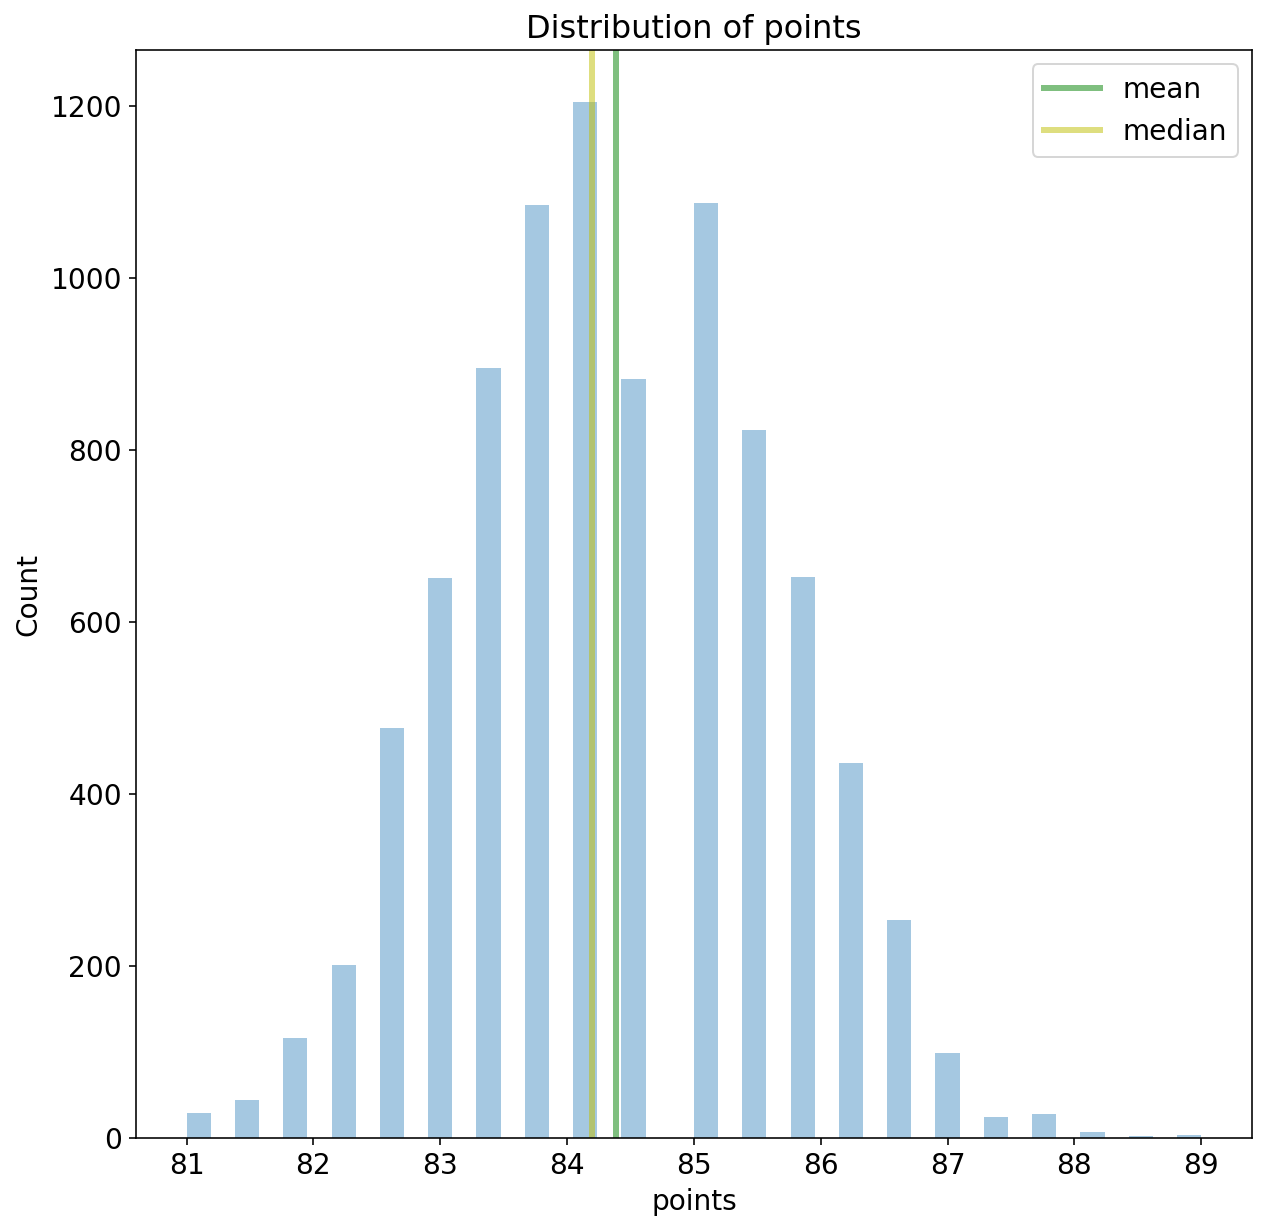

In [28]:
figsize(10, 10)
plt.rcParams['font.size'] = 14
g = plot_histogram(train, "points")
xlabels=range(80, 101, 1)
g.set_xticklabels(xlabels)

In [29]:
train.points.median()

88.0

In [30]:
train.points.mean()

88.45522222222222

## 2.2. Distribution of price

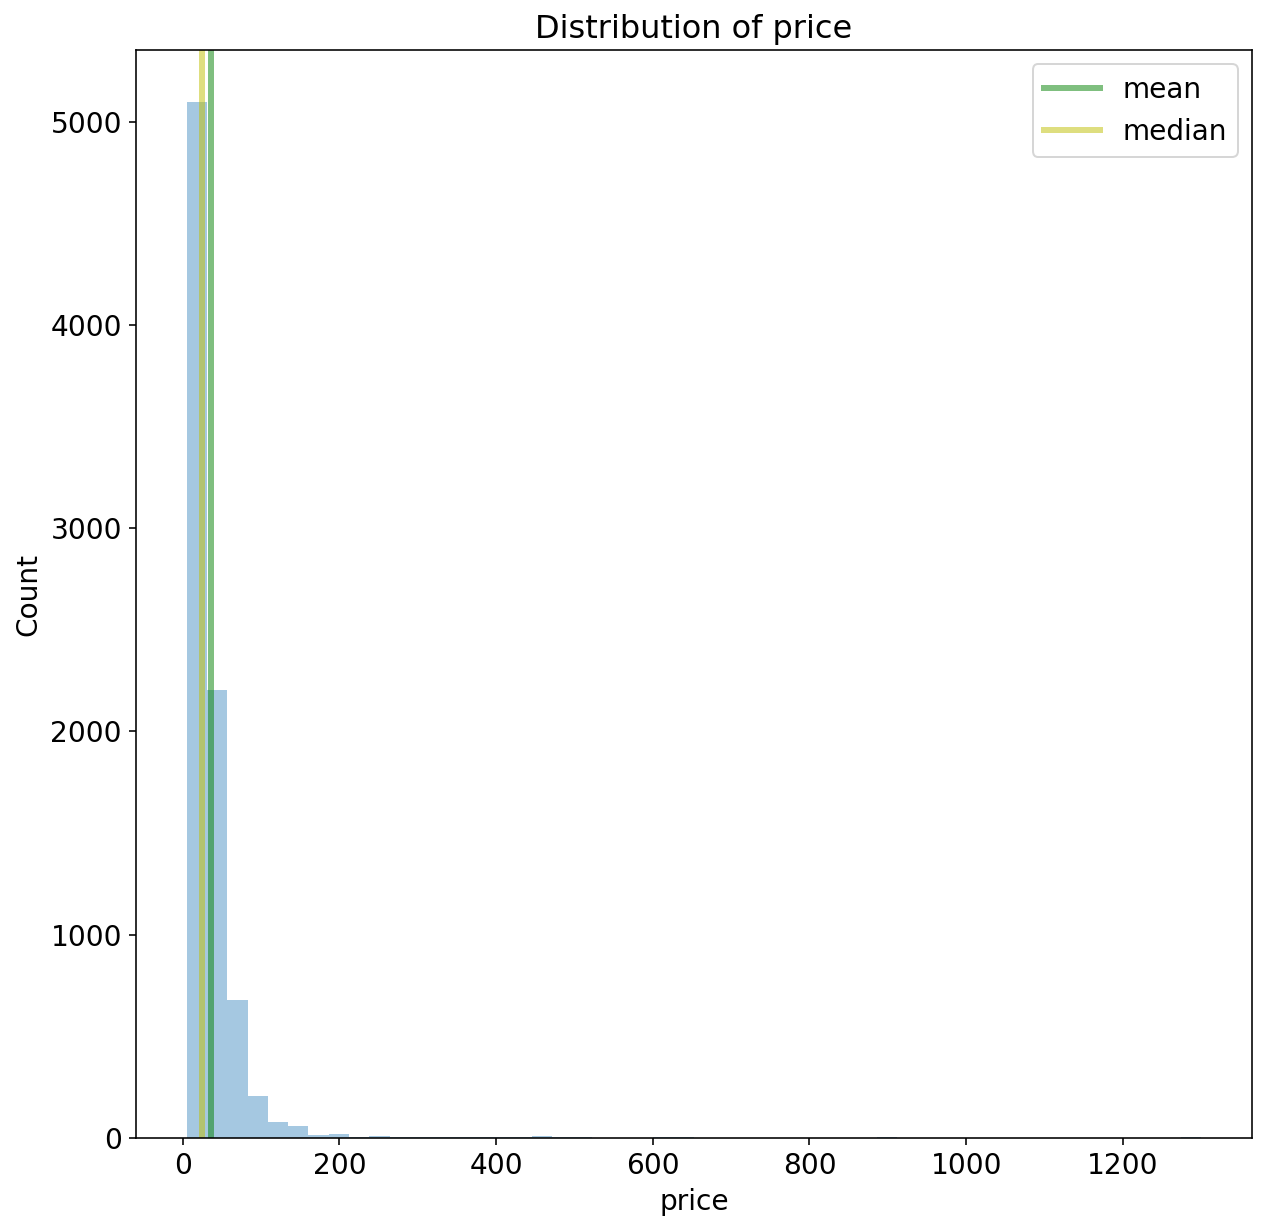

In [21]:
figsize(10, 10)
plt.rcParams['font.size'] = 14
plot_histogram(train, "price")

(0, 200)

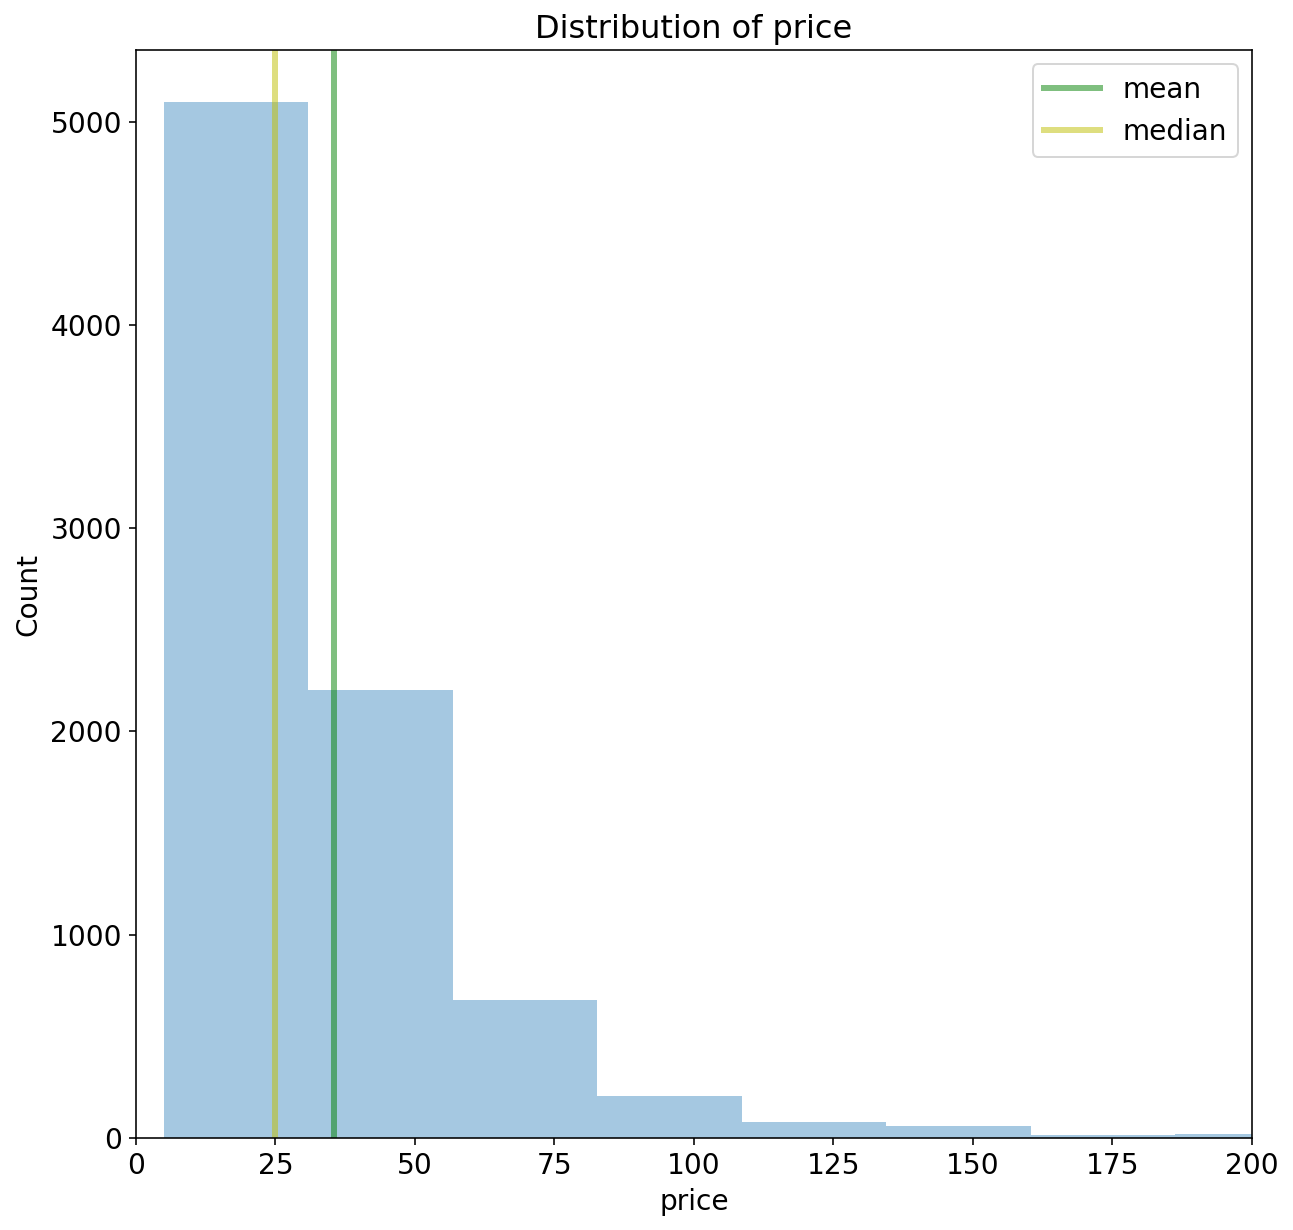

In [22]:
figsize(10, 10)
plt.rcParams['font.size'] = 14
plot_histogram(train, "price")
plt.xlim(0,200)

**No outlier removal for now**

## 2.3. Points-Country

In [23]:
countries = train["country"].value_counts()
top_countries = list(countries[countries.values > 300].index)

top2_countries = list(countries[(countries.values <= 300) & 
                                (countries.values >100)].
                      index)

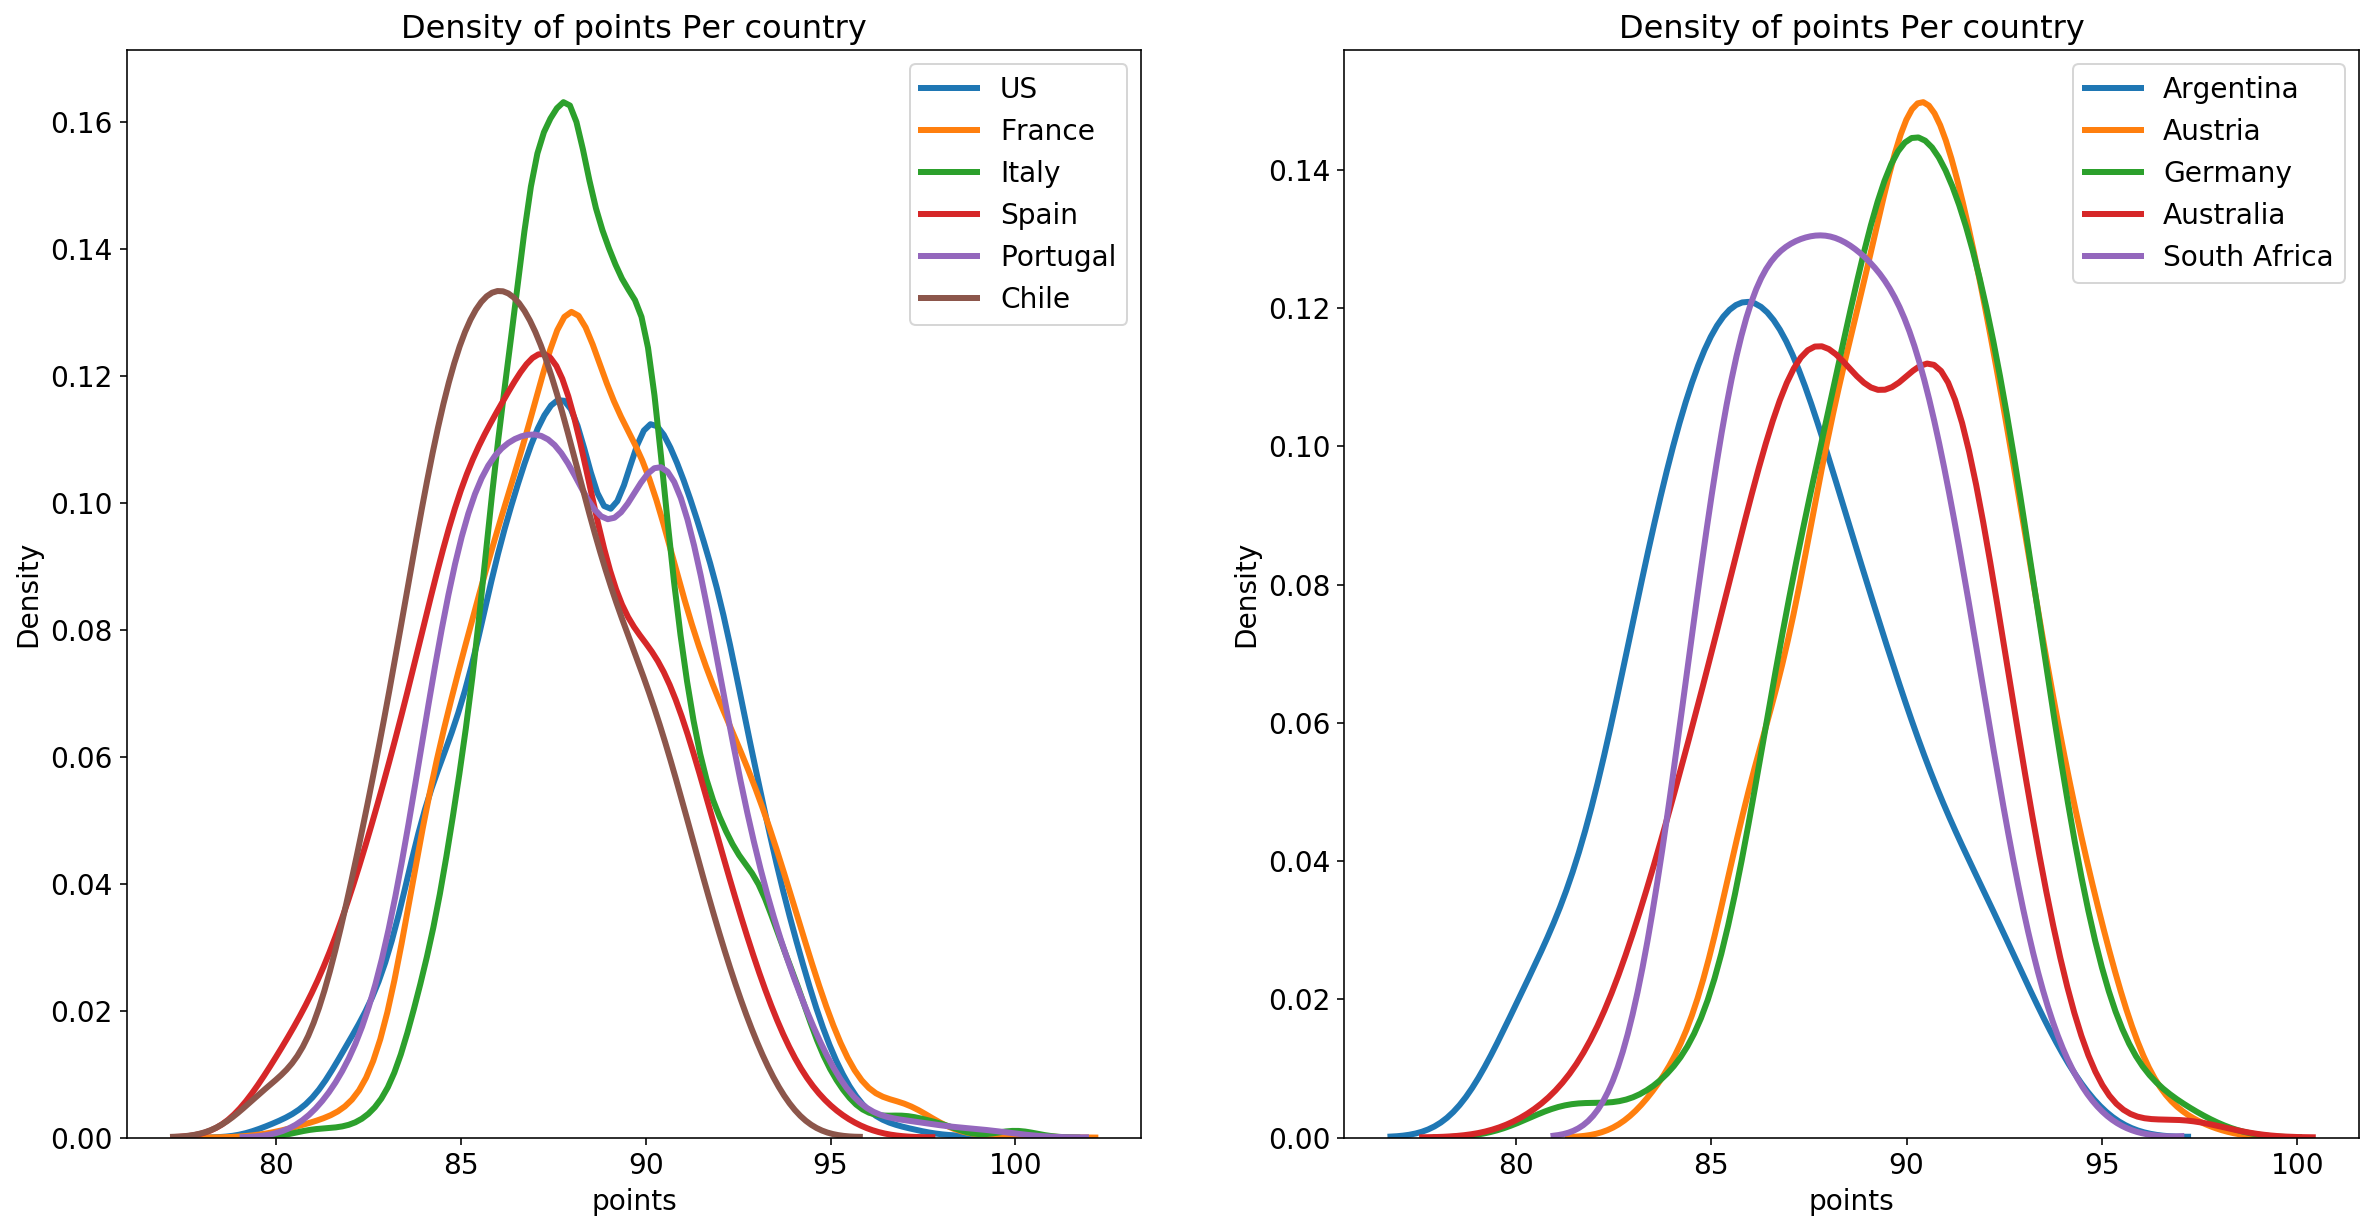

In [24]:
# distribution of the points in different countries
figsize(20, 10)
plt.rcParams['font.size'] = 14

# plot points distribution for top country
plt.subplot(1,2,1)
plot_distribution(train, "points", top_countries, "country")

# plot points distribution for top2 country
plt.subplot(1,2,2)
plot_distribution(train, "points", top2_countries, "country")

## 2.4. Points-Price-Top Countries

In [25]:
train_top_countries = train[(train["country"] == "US") |
                            (train["country"] == "France") |
                            (train["country"] == "Italy") |
                            (train["country"] == "Spain") |
                            (train["country"] == "Portugal")| 
                            (train["country"] == "Chile")]

In [63]:
ttp = train[train.country.isin(top_countries)]

In [64]:
ttp

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety
0,US,"Expressive aromas of smoke, embers and blue fr...",88,35.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Damsel 2013 Syrah (Columbia Valley (WA)),Syrah
2,Portugal,"An elegant, finely rounded wine, with firm tan...",90,NaN,Douro,NaN,Roger Voss,@vossroger,Quinta de la Rosa 2008 Red (Douro),Portuguese Red
4,Portugal,"Lightly wood aged and spicy, this is a fine re...",90,NaN,Dão,NaN,Roger Voss,@vossroger,Seacampo 2014 Casa Américo Branco Reserva Encr...,Encruzado
6,France,"This is a full and creamy wine, with an abunda...",90,25.0,Provence,Bandol,Roger Voss,@vossroger,La Bastide Blanche 2012 White (Bandol),Provence white blend
8,France,"Rounded wine, softly fruity. Its attractivenes...",85,21.0,Burgundy,Montagny,Roger Voss,@vossroger,Vignerons de Buxy 2011 Buissonnier (Montagny),Chardonnay
...,...,...,...,...,...,...,...,...,...,...
8991,Spain,"Fresh, perky, sweaty and citric on the nose, w...",90,23.0,Northern Spain,Rueda,Michael Schachner,@wineschach,José Pariente 2009 Verdejo (Rueda),Verdejo
8995,France,"The fruit bursts out of the glass, while the s...",92,NaN,Burgundy,Echézeaux,Roger Voss,@vossroger,Bouchard Aîné & Fils 2005 Echézeaux,Pinot Noir
8996,US,There's a noticeable tilt of barrel reduction ...,87,30.0,California,Sonoma Coast,Virginie Boone,@vboone,Krutz 2014 Magnolia Pinot Noir (Sonoma Coast),Pinot Noir
8997,France,"This perfumed, herbal blend of Syrah and Grena...",86,19.0,Provence,Côtes de Provence,Roger Voss,@vossroger,Château Roquefeuille 2016 Rosé in the Air Rosé...,Rosé


Text(0.5, 1.0, 'Points vs Price')

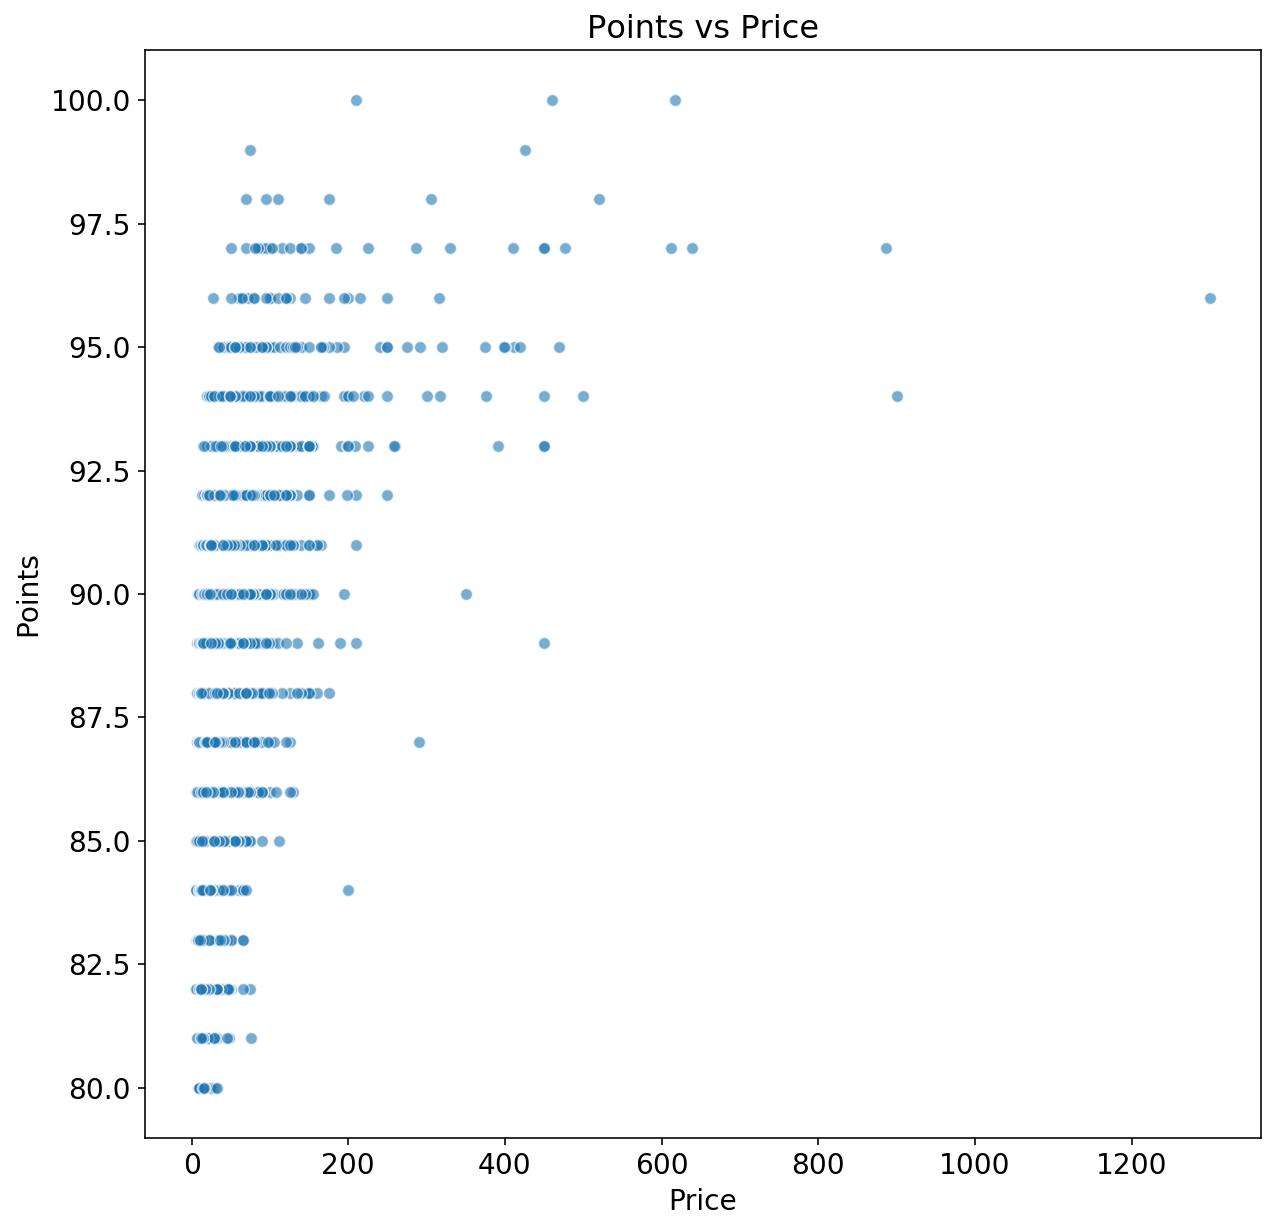

In [65]:
# set plot size and font size
figsize(10, 10)
plt.rcParams['font.size'] = 14

# plot a scatterplot of Points and Price
sns.scatterplot(x='price', y='points',
                data=train,
                alpha=0.6)

# Plot labeling
plt.xlabel("Price", size=14)
plt.ylabel("Points", size=14)
plt.title("Points vs Price", size=16)

Text(0.5, 1.0, 'Points vs Price')

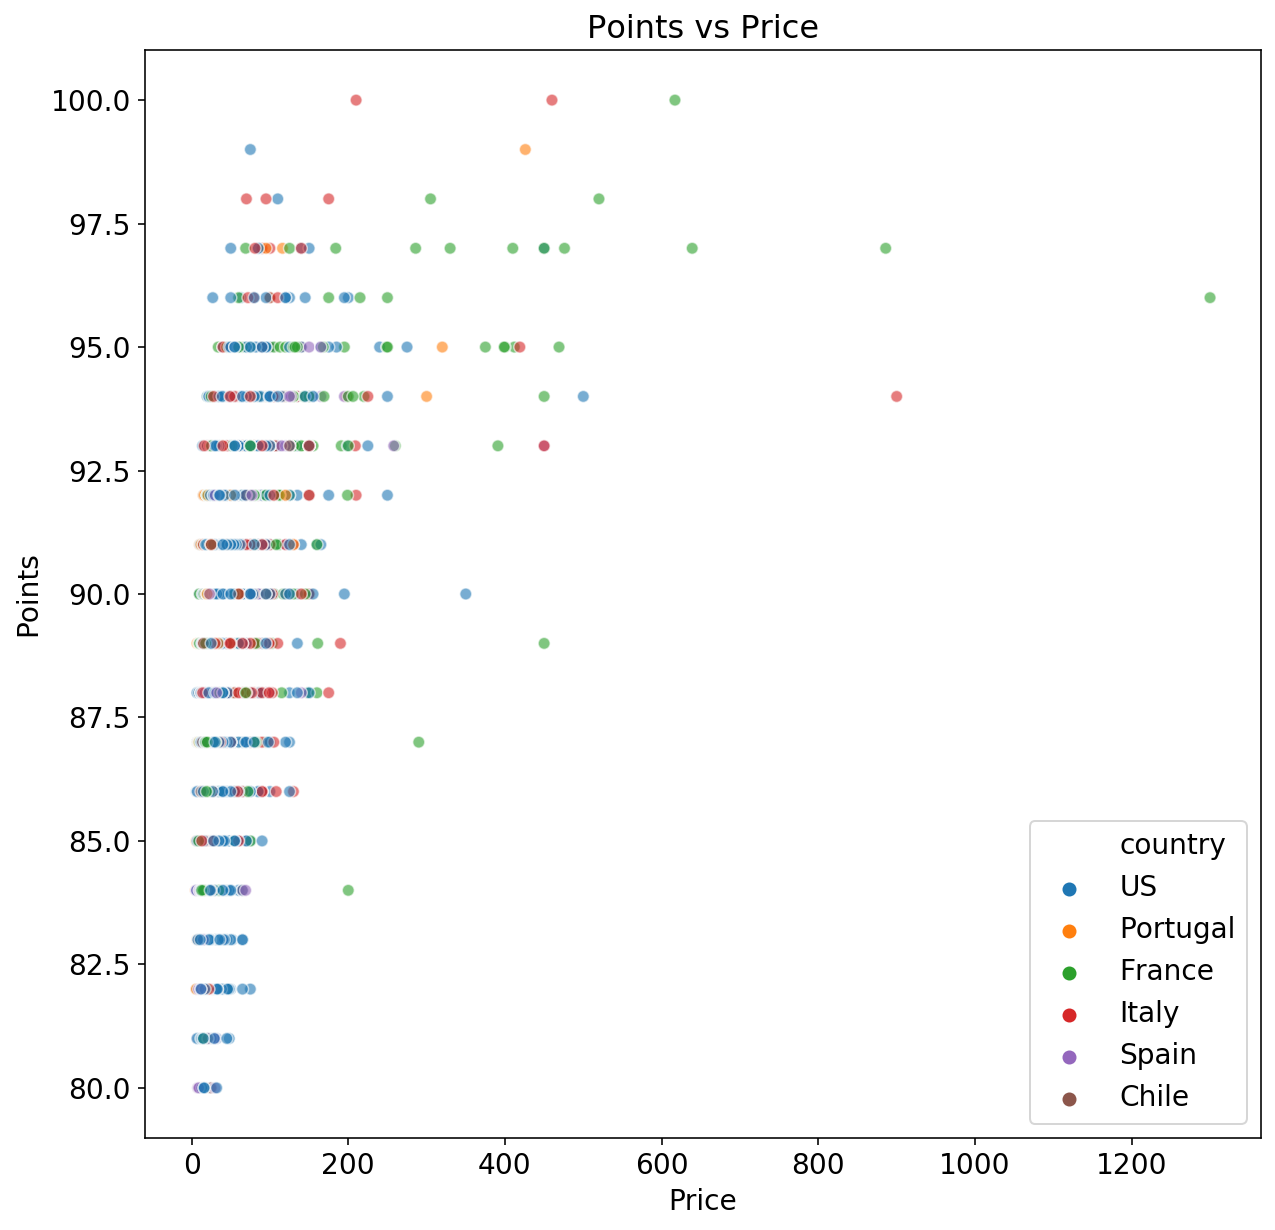

In [26]:
# set plot size and font size
figsize(10, 10)
plt.rcParams['font.size'] = 14

# plot a scatterplot of Points and Price
sns.scatterplot(x='price', y='points',
                hue='country', data=train_top_countries,
                alpha=0.6)

# Plot labeling
plt.xlabel("Price", size=14)
plt.ylabel("Points", size=14)
plt.title("Points vs Price", size=16)

## 2.5. Points-Province in Top Countries

In [27]:
# for US
us_provinces = train[train["country"] == "US"]["province"].value_counts()
us_provinces = list(us_provinces.index)

# for France
fr_provinces = train[train["country"] == "France"]["province"].value_counts()
fr_provinces = list(fr_provinces.index)

# for Italy
it_provinces = train[train["country"] == "Italy"]["province"].value_counts()
it_provinces = list(it_provinces.index)

# for Spain
es_provinces = train[train["country"] == "Spain"]["province"].value_counts()
es_provinces = list(es_provinces.index)

In [68]:
def create_province_list(country_name):
    indexed_train = train.set_index("country")
    province_list = list(indexed_train.loc[country_name]["province"].unique())
    return province_list

In [69]:
print(create_province_list("US"))

['Washington', 'California', 'Virginia', 'Oregon', 'New York', 'Idaho', 'America', 'New Mexico', 'Texas', 'North Carolina', 'Michigan', 'Colorado', 'Missouri', 'Arizona', 'Illinois']


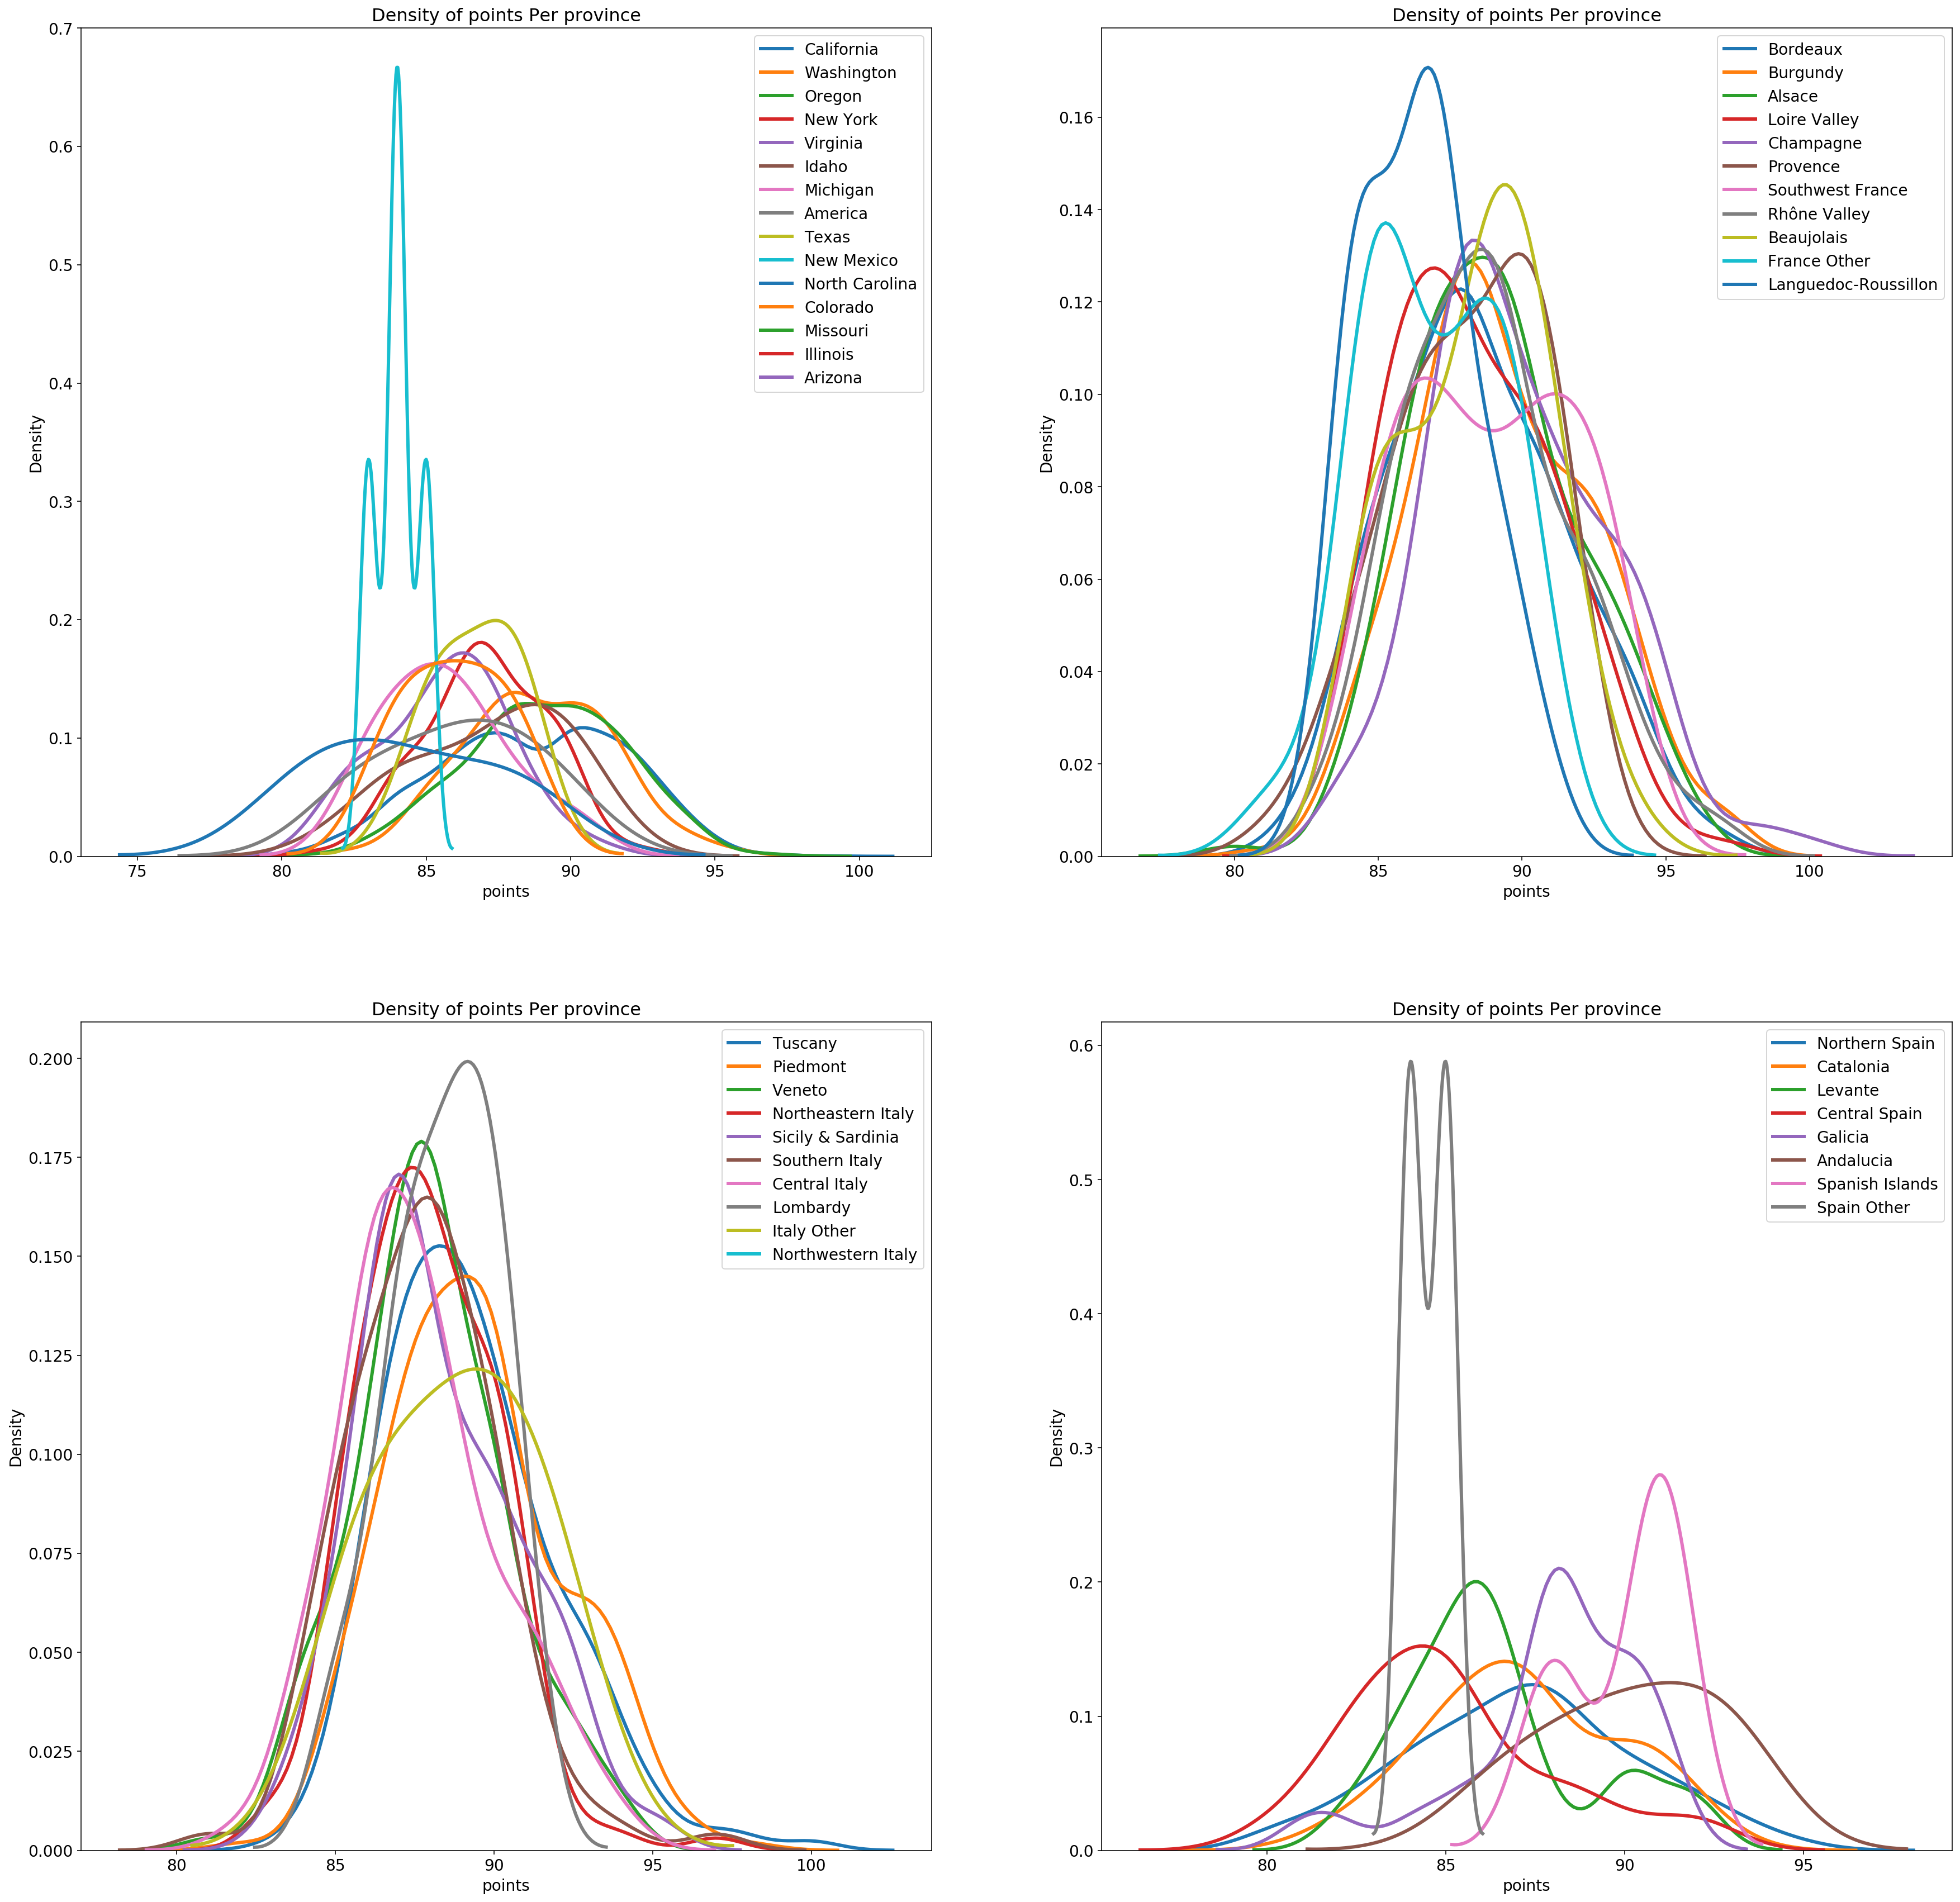

In [28]:
# distribution of provinces
figsize(30, 30)
plt.rcParams['font.size'] = 14

# plot points distribution for provinces
plt.subplot(2,2,1)
plot_distribution(train, "points", us_provinces, "province")

# plot points distribution for provinces
plt.subplot(2,2,2)
plot_distribution(train, "points", fr_provinces, "province")

# plot points distribution for provinces
plt.subplot(2,2,3)
plot_distribution(train, "points", it_provinces, "province")

# plot points distribution for provinces
plt.subplot(2,2,4)
plot_distribution(train, "points", es_provinces, "province")

## 2.6. Points-Taster Name

Text(0.5, 1.0, 'Points from Different Tasters')

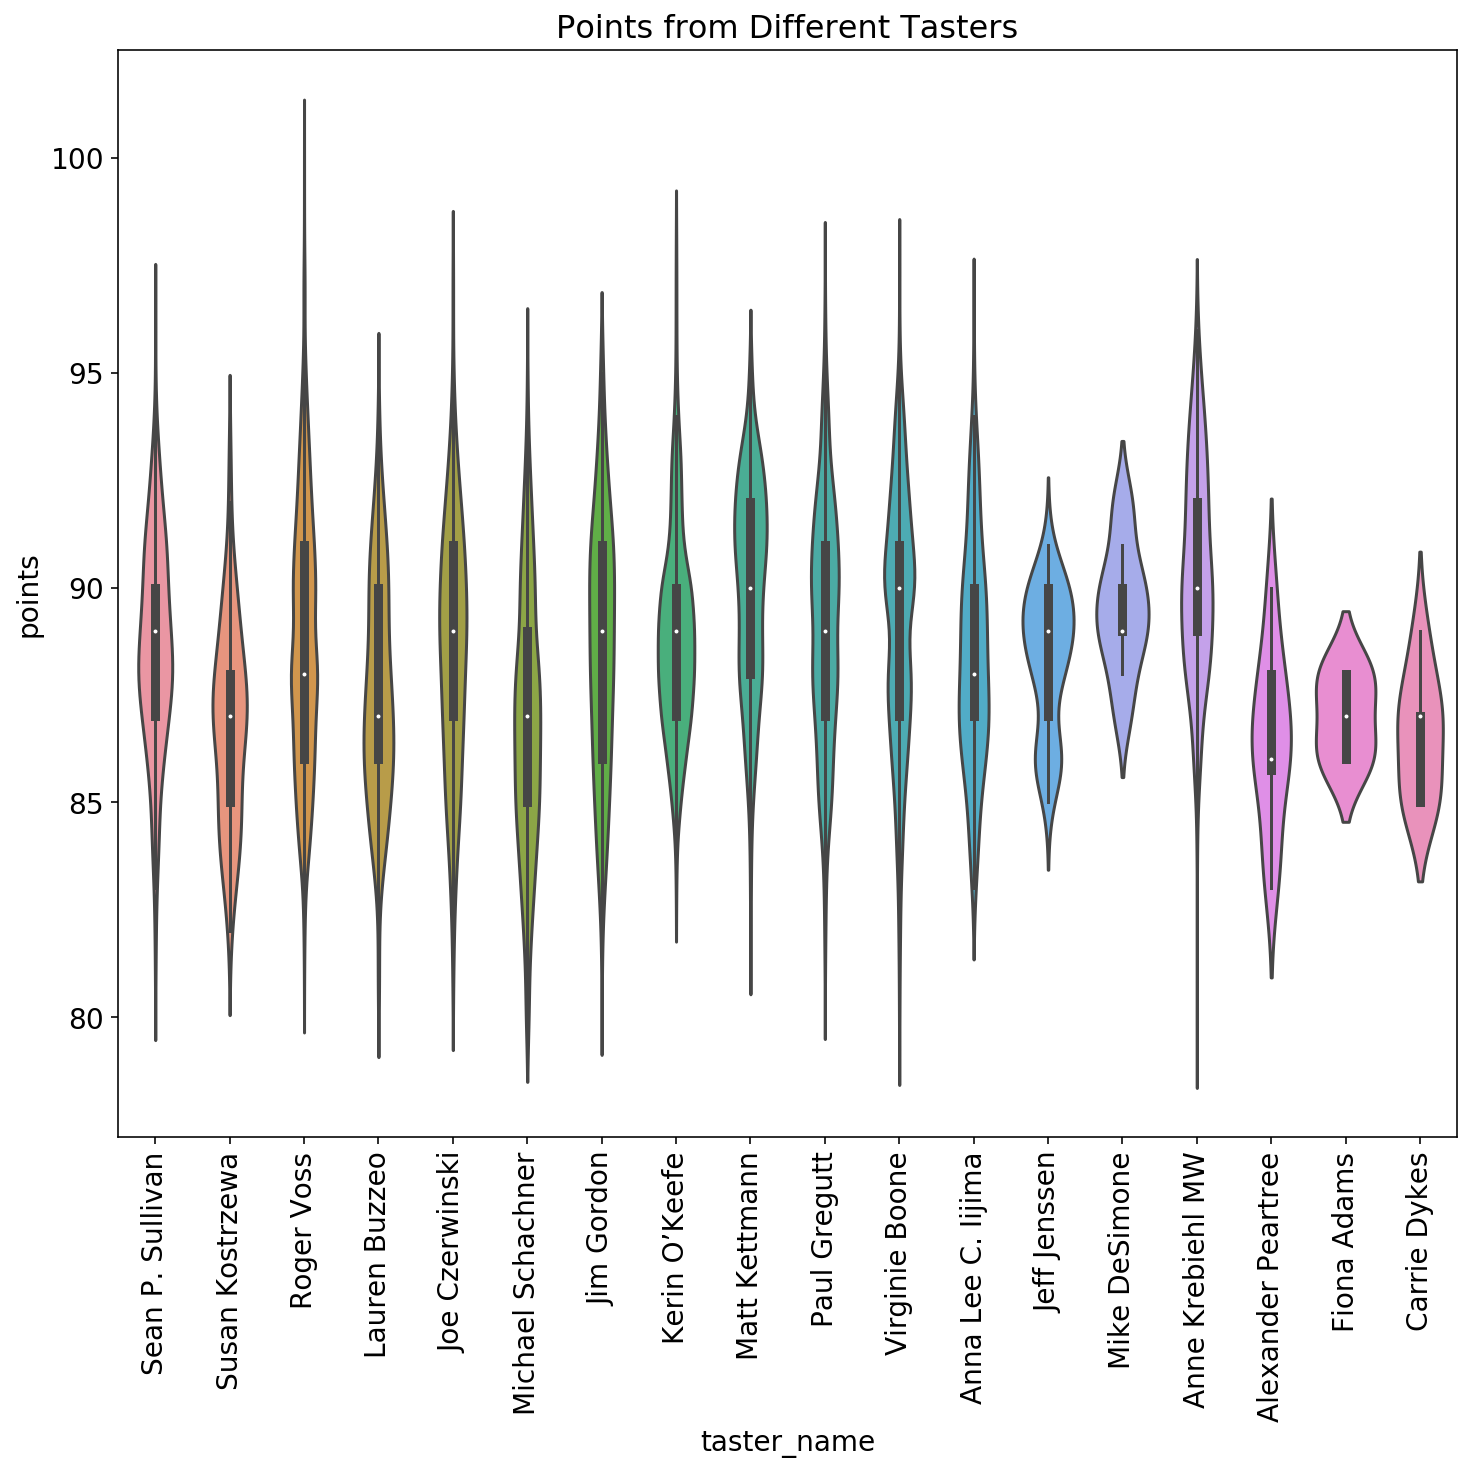

In [29]:
# set plot size and font size
figsize(12, 10)
plt.rcParams['font.size'] = 14

# violin plot to see statistics and distribution
f = sns.violinplot(data=train,  x="taster_name", y="points")
f.set_xticklabels(f.get_xticklabels(), rotation=90)

plt.title("Points from Different Tasters", size=16)

## 2.7. Points-Variety

In [30]:
variaties = train["variety"].value_counts()

top_varieties = list(variaties[variaties.values > 200].index)
top2_varieties = list(variaties[(variaties.values <= 200) & 
                                (variaties.values >100)].
                      index)

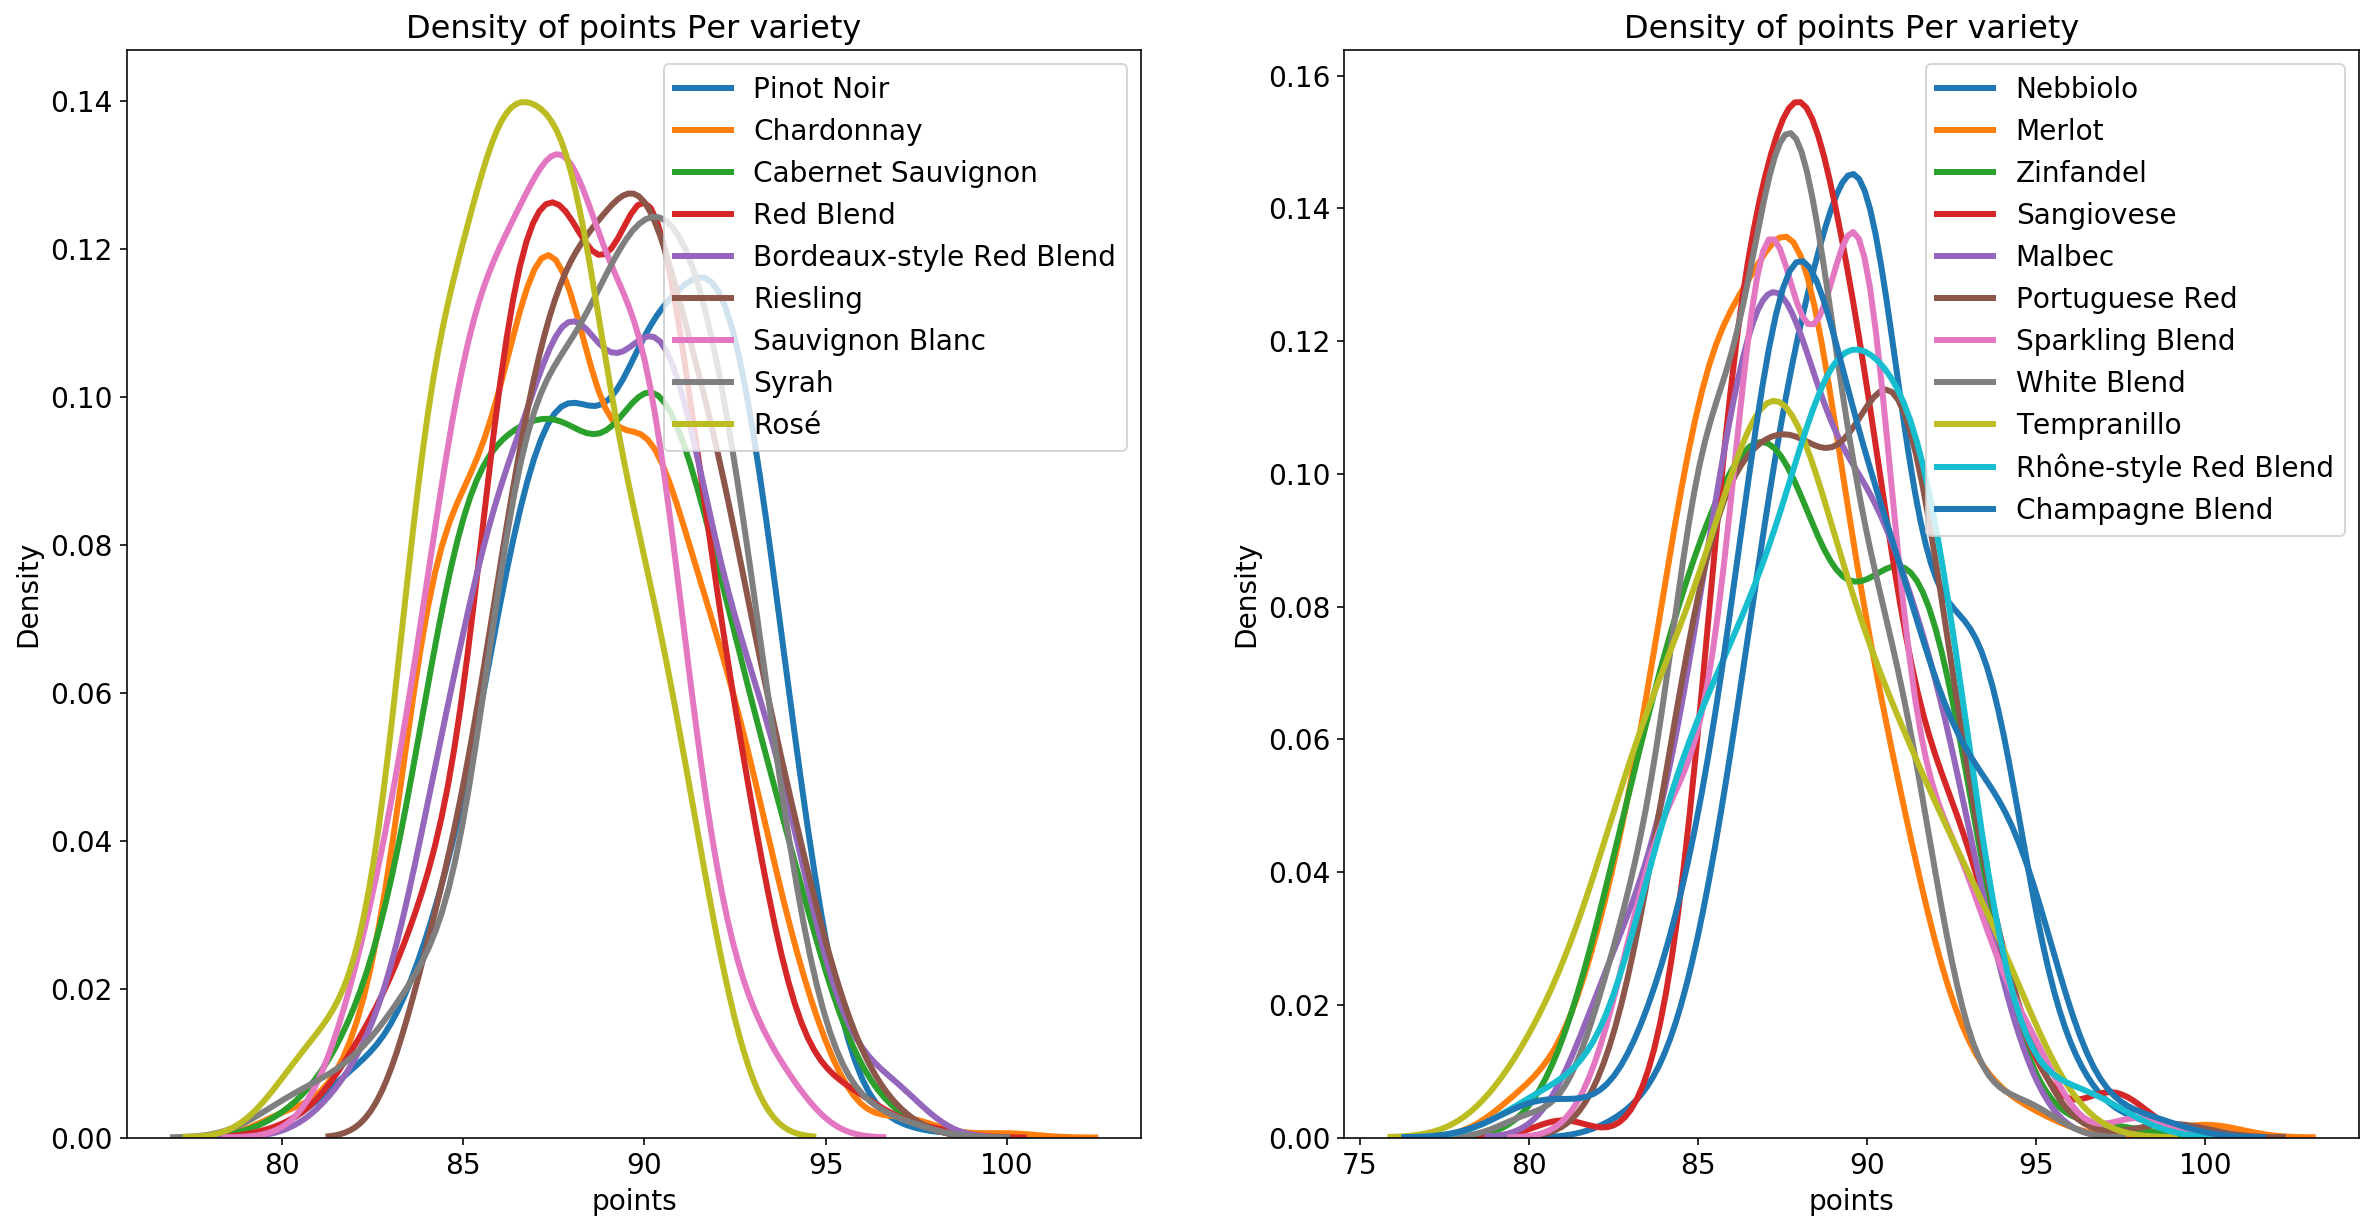

In [31]:
# distribution of the points in different countries
figsize(20, 10)
plt.rcParams['font.size'] = 14

# plot points distribution for top country
plt.subplot(1,2,1)
plot_distribution(train, "points", top_varieties, "variety")

# plot points distribution for top2 country
plt.subplot(1,2,2)
plot_distribution(train, "points", top2_varieties, "variety")

# 3. Split data into train and validation set

In [32]:
# Separate out the features and targets
features = train.drop(columns='points')
targets = pd.DataFrame(train['points'])

In [ ]:
features[features[]]

In [33]:
# Split into 80% training and 20% testing set
X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size = 0.2, random_state = 42)

# 4. Set Evaluation Metric: : MAE and Establish a Baseline

price will be imputed with: median because this value is robust to outliers
taster_name will be imputed with: Unknown
rest of the categorical features imputed with most frequent

In [34]:
X_train.price.mean()

35.611946968568446

In [36]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.mean(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_valid, baseline_guess))

The baseline guess is a score of 88.45
Baseline Performance on the test set: MAE = 2.5006


In [39]:
#features.to_csv('features.csv', index = False)
#target.to_csv('target.csv', index = False)

In [35]:
# impute taster_name
#X_train=X_train.fillna({"taster_name":"Unknown",
#                        "price":X_train.price.median()})
#X_valid=X_valid.fillna({"taster_name":"Unknown",
#                      "price":X_train.price.median()})

In [36]:
#imputer = SimpleImputer(strategy="most_frequent")

# Train on the training features
#imputer.fit(X_train)

# Transform both training data and validation data
#imputed_train_set = imputer.transform(X_train)
#imputed_valid_set = imputer.transform(X_valid)

In [37]:
#X_train = pd.DataFrame(imputed_train_set, 
#                       columns=X_train.columns)
#X_train["price"] = X_train.price.astype(float)
#
#X_valid = pd.DataFrame(imputed_valid_set, 
#                       columns=X_valid.columns)
#X_valid["price"] = X_valid.price.astype(float)

In [38]:
#merge train and valid sets back to apply encoding algorithms
#features = pd.concat([X_train, X_valid])
#target = pd.concat([y_train, y_valid])

In [39]:
#features.head()

,country,price,province,region_1,taster_name,variety
0,US,50.0,Washington,Red Mountain,Sean P. Sullivan,Chenin Blanc
1,US,28.0,California,Temecula Valley,Matt Kettmann,Falanghina
2,Germany,612.0,Rheingau,Napa Valley,Joe Czerwinski,Riesling
3,US,15.0,Washington,Yakima Valley,Paul Gregutt,Riesling
4,France,19.0,Alsace,Alsace,Anne Krebiehl MW,Riesling


In [40]:
#target.isna().any()

points    False
dtype: bool

In [39]:
train["country"].value_counts()

US                3744
France            1559
Italy             1330
Spain              467
Portugal           384
Chile              305
Argentina          280
Austria            243
Germany            150
Australia          145
South Africa       103
New Zealand         98
Israel              50
Greece              32
Canada              13
Bulgaria            11
Romania             10
Uruguay              9
Hungary              9
England              7
Croatia              7
Slovenia             6
Turkey               5
Mexico               5
Moldova              4
Lebanon              3
Georgia              3
Serbia               2
Czech Republic       2
Peru                 1
Armenia              1
Cyprus               1
Brazil               1
Morocco              1
Macedonia            1
India                1
Switzerland          1
Name: country, dtype: int64

In [40]:
test["country"].value_counts()

US              409
France          175
Italy           147
Spain            58
Chile            51
Portugal         39
Argentina        29
Austria          26
Australia        17
Germany          15
South Africa     12
New Zealand       6
Canada            4
Israel            2
Greece            2
Bulgaria          2
Romania           1
England           1
Slovenia          1
Mexico            1
Hungary           1
Turkey            1
Name: country, dtype: int64

In [41]:
train["province"].value_counts().head(18)

California            2483
Washington             594
Bordeaux               414
Tuscany                413
Oregon                 365
Burgundy               295
Northern Spain         269
Piedmont               254
Mendoza Province       253
New York               190
Alsace                 169
Veneto                 168
Northeastern Italy     152
Loire Valley           126
Champagne              121
Sicily & Sardinia      111
Southern Italy         104
Provence               100
Name: province, dtype: int64

In [42]:
test["province"].value_counts().head(18)

California            270
Washington             64
Tuscany                47
Oregon                 44
Bordeaux               44
Northern Spain         37
Alsace                 28
Piedmont               26
Burgundy               26
Mendoza Province       24
Veneto                 21
New York               20
Loire Valley           17
Sicily & Sardinia      15
Champagne              13
Provence               12
Northeastern Italy     12
Southwest France       11
Name: province, dtype: int64

In [43]:
train["region_1"].value_counts().head(20)

Napa Valley               315
Columbia Valley (WA)      305
Russian River Valley      210
California                193
Mendoza                   172
Willamette Valley         166
Paso Robles               155
Alsace                    150
Champagne                 121
Finger Lakes              118
Rioja                     105
Sonoma Coast              103
Barolo                    103
Brunello di Montalcino    102
Toscana                    95
Chianti Classico           78
Santa Barbara County       74
Sonoma County              74
Santa Lucia Highlands      67
Carneros                   64
Name: region_1, dtype: int64

In [44]:
test["region_1"].value_counts().head(20)

Columbia Valley (WA)      40
Napa Valley               35
Russian River Valley      25
Alsace                    22
Willamette Valley         22
California                19
Mendoza                   14
Paso Robles               14
Barolo                    13
Chianti Classico          13
Champagne                 13
Brunello di Montalcino    13
Finger Lakes              12
Central Coast             11
Rioja                     11
Sonoma Coast              11
Carneros                  10
Santa Barbara County      10
Sicilia                    9
Lodi                       9
Name: region_1, dtype: int64

In [45]:
train["taster_name"].value_counts()

Roger Voss            1763
Michael Schachner     1069
Kerin O’Keefe          786
Paul Gregutt           661
Virginie Boone         647
Matt Kettmann          421
Joe Czerwinski         354
Sean P. Sullivan       332
Anna Lee C. Iijima     302
Jim Gordon             292
Anne Krebiehl MW       266
Lauren Buzzeo          141
Susan Kostrzewa         73
Mike DeSimone           39
Jeff Jenssen            39
Alexander Peartree      24
Carrie Dykes             9
Fiona Adams              5
Name: taster_name, dtype: int64

In [46]:
test["taster_name"].value_counts()

Roger Voss            193
Michael Schachner     139
Paul Gregutt           86
Kerin O’Keefe          75
Virginie Boone         72
Matt Kettmann          41
Jim Gordon             33
Anna Lee C. Iijima     33
Joe Czerwinski         32
Sean P. Sullivan       29
Anne Krebiehl MW       29
Lauren Buzzeo          15
Susan Kostrzewa         7
Jeff Jenssen            4
Alexander Peartree      2
Mike DeSimone           1
Carrie Dykes            1
Name: taster_name, dtype: int64

In [71]:
value_counts = train["variety"].value_counts()
value_counts[value_counts.values > 1]

Pinot Noir                  921
Chardonnay                  856
Cabernet Sauvignon          685
Red Blend                   623
Bordeaux-style Red Blend    483
                           ... 
Moschofilero                  2
Ugni Blanc-Colombard          2
Gros and Petit Manseng        2
Cabernet Merlot               2
Malbec-Syrah                  2
Name: variety, Length: 205, dtype: int64

In [48]:
test["variety"].value_counts().head(21)

Chardonnay                    94
Pinot Noir                    94
Cabernet Sauvignon            81
Red Blend                     79
Riesling                      44
Sauvignon Blanc               42
Bordeaux-style Red Blend      42
Syrah                         32
Merlot                        28
Rosé                          27
Sparkling Blend               23
Zinfandel                     22
Nebbiolo                      21
White Blend                   18
Portuguese Red                17
Sangiovese                    16
Malbec                        14
Pinot Gris                    14
Tempranillo                   13
Bordeaux-style White Blend    12
Carmenère                     11
Name: variety, dtype: int64

In [47]:
a= {'name': ['Pam', np.nan, 'Stanley', 'Pam', 'Bob_Vance'],
             'nationality': ['USA', 'USA', 'USA', 'USA', 'UK'],
             'age': [42, 42, 42, 42, 70]}

b = pd.DataFrame(a, columns=['name', 'nationality', 'age'])

In [48]:
b

,name,nationality,age
0,Pam,USA,42
1,NaN,USA,42
2,Stanley,USA,42
3,Pam,USA,42
4,Bob_Vance,UK,70


In [49]:
b.drop_duplicates()

,name,nationality,age
0,Pam,USA,42
1,NaN,USA,42
2,Stanley,USA,42
4,Bob_Vance,UK,70


In [52]:
a_train = ["a", "b", "c", "d", "e", "f"] # train
b_test = ["a", "b", "c", "d", "e"] # test
c_list = ["a", "b", "c", "d", "e", "f"]

In [ ]:
a_train = ["a", "b", "c", "d", "e", "f", "x", "Unkown"] # train
b_test = ["a", "b", "c", "d", "e", "Unknown"] # test

In [ ]:
a_train = ["a", "b", "c", "d", "e", "f", "Unknown"] # train
b_test = ["a", "b", "c", "d", "e", "x", "y", "z", "Unknown"] # test

In [ ]:
a_train = ["a", "b", "c", "d", "e", "f", "Unknown"] # train
b_test = ["a", "b", "c", "d", "e", "f", "Unknown"] # test

In [53]:
# taster_nameleri one hot encode etme ve missingleri handle etme fonksiyonu

test.remove boşluk from string names
test.fillna(Unknown)


def preprocess_taster_name(a_train, b_test):
    #train_taster_names = list(train_df["taster_name"].unique())
    #test_taster_names =  list(test_df["taster_name"].unique())
    
    unknown_dict = {}
    
    if set(a_train) < set(b_test):
        dif_list = list(set(b_test) - set(a_train))
        
        for item in dif_list:
            unknown_dict[item] = "Unknown"
        
        b_test.taster_name.replace(unknown_dict, inplace=True)
        #b_test one hot encode
        
    elif set(a_train) > set(b_test):
        dif_list = list(set(a_train) - set(b_test))
        
        for taster in dif_list:
            b_test[taster] = 0
        
        #b_test one_hot_encode
    
    else:
        # b_test one hot encode

In [54]:
print(check_taster_name(a_list, b_list))

{}


In [62]:
a= {'name': ['Pam adaw', "ABN asdsd", 'Stanley ade', 'Pam asdsf', 'Bob_Vance adsf'],
             'nationality': ['USA', 'USA', 'USA', 'USA', 'UK'],
             'age': [42, 42, 42, 42, 70]}

b = pd.DataFrame(a, columns=['name', 'nationality', 'age'])

In [58]:
b = b.fillna({"name": "Unknown"})

In [59]:
b

,name,nationality,age
0,Pam,USA,42
1,ABN,USA,42
2,Stanley,USA,42
3,Pam,USA,42
4,Bob_Vance,UK,70


In [61]:
print(list(b.name.unique()))

['Pam', 'ABN', 'Stanley', 'Bob_Vance']


In [82]:
b['name'] = b['name'].str.replace(" ", "")

In [83]:
b["name"]

0          Pamadaw
1         ABNasdsd
2       Stanleyade
3         Pamasdsf
4    Bob_Vanceadsf
Name: name, dtype: object

In [76]:
q = " asdkjk "

In [77]:
print(q.strip())

asdkjk


In [116]:
def preprocess_taster_name(train_df, test_df):
    train_taster_names = list(train_df["taster_name"].unique())
    test_taster_names =  list(test_df["taster_name"].unique())
    
    unknown_dict = {}
    
    if set(train_taster_names) < set(test_taster_names):
        dif_list = list(set(test_taster_names) - set(train_taster_names))
        
        for item in dif_list:
            unknown_dict[item] = "Unknown"
        
        test_df.taster_name.replace(unknown_dict, inplace=True)
        test_df_oh = one_hot_encoder.transform(test_df)
        
    elif set(train_taster_names) > set(test_taster_names):
        dif_list = list(set(train_taster_names) - set(test_taster_names))
        
        test_df_oh = one_hot_encoder.transform(test_df)
        
        #for taster in dif_list:
            #test_df["taster_name_" + taster] = 0
        
    
    else:
        test_df_oh = one_hot_encoder.transform(test_df)
    
    return test_df_oh

In [93]:
df1= {'taster_name': ['a', "b", 'c', 'd', 'e', "f", "Unknown"]}
train_df1 = pd.DataFrame(df1, columns=['taster_name'])

df2= {'taster_name': ['a', "b", 'c', 'd', 'e', "f", "x", "y", "z"]}
test_df2 = pd.DataFrame(df2, columns=['taster_name'])



df3= {'taster_name': ['a', "b", 'c', 'd', 'e', "f", "x", "y", "Unknown"]}
train_df3 = pd.DataFrame(df3, columns=['taster_name'])

df4= {'taster_name': ['a', "b", 'c', 'd', 'e']}
test_df4 = pd.DataFrame(df4, columns=['taster_name'])


df5= {'taster_name': ['a', "b", 'c', 'd', 'e', "f"]}
train_df5 = pd.DataFrame(df5, columns=['taster_name'])

df6= {'taster_name': ['a', "b", 'c', 'd', 'e', "f"]}
test_df6 = pd.DataFrame(df6, columns=['taster_name'])

In [115]:
print(set(train_df1.taster_name)) < set(test_df2.taster_name))

{'e', 'c', 'Unknown', 'a', 'd', 'b', 'f'}


In [99]:
train_df1, test_df2
train_df3, test_df4
train_df5, test_df6 

,taster_name
0,a
1,b
2,c
3,d
4,e
5,f


In [110]:
train_df3

,taster_name
0,a
1,b
2,c
3,d
4,e
5,f
6,x
7,y
8,Unknown


In [117]:
from category_encoders.one_hot import OneHotEncoder
one_hot_encoder = OneHotEncoder(cols=["taster_name"], 
                                return_df=True,
                                use_cat_names = True)

#train_ord_oh = train_ord.copy()

one_hot_encoder.fit(train_df3)
train_df3_oh = one_hot_encoder.transform(train_df3)

In [118]:
train_df3_oh

,taster_name_a,taster_name_b,taster_name_c,taster_name_d,taster_name_e,taster_name_f,taster_name_x,taster_name_y,taster_name_Unknown
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1


In [121]:
train_df3

,taster_name
0,a
1,b
2,c
3,d
4,e
5,f
6,x
7,y
8,Unknown


In [122]:
preprocess_taster_name(train_df3, test_df4)

ValueError: Unexpected input dimension 5, expected 1

In [107]:
test_df2

,taster_name
0,a
1,b
2,c
3,d
4,e
5,f
6,x
7,y
8,z
